In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
from matplotlib import pyplot as plt 

In [2]:
delivery = pd.read_csv("delivery_time.csv")

In [3]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
delivery.shape

(21, 2)

In [6]:
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [7]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
deliverytime = delivery["Delivery Time"]

In [12]:
sortingtime = delivery["Sorting Time"]

In [13]:
deliverytime

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [14]:
sortingtime

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x204c2ff1e50>,
 'caps': [<matplotlib.lines.Line2D at 0x204c2f64df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204c2ff1400>],
 'medians': [<matplotlib.lines.Line2D at 0x204c2f6a4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204c2f6a940>],
 'means': []}

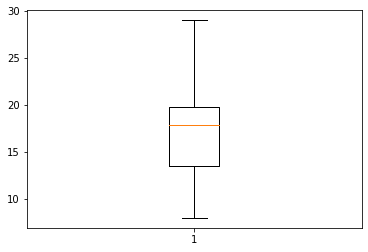

In [15]:
plt.boxplot(deliverytime)

{'whiskers': [<matplotlib.lines.Line2D at 0x204c28fff10>,
 'caps': [<matplotlib.lines.Line2D at 0x204c3878a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x204c28ff0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x204c2efa790>],
 'fliers': [<matplotlib.lines.Line2D at 0x204c2ba7e80>],
 'means': []}

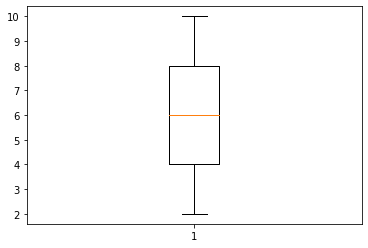

In [16]:
plt.boxplot(sortingtime)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

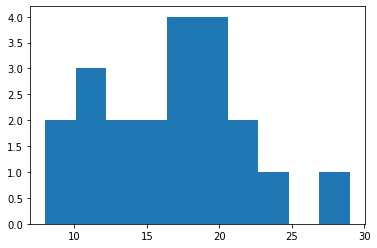

In [17]:
plt.hist(deliverytime)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

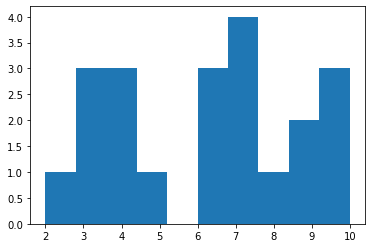

In [18]:
plt.hist(sortingtime)

Text(0, 0.5, 'sorting time')

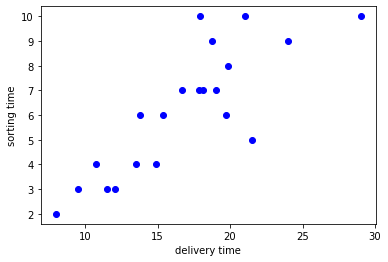

In [19]:
plt.plot(deliverytime,sortingtime,"bo")
plt.xlabel("delivery time")
plt.ylabel("sorting time") 

In [20]:
sortingtime.corr(deliverytime) 

0.8259972607955325

In [21]:
import statsmodels.formula.api as smf
model=smf.ols("sortingtime~deliverytime",data=delivery).fit()


In [22]:
model.params

Intercept      -0.756673
deliverytime    0.413744
dtype: float64

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sortingtime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                        09:35:31   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
deliverytime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.resid 


0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [26]:
model.resid_pearson 

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [27]:
print(model.conf_int(0.05))

                     0         1
Intercept    -3.130058  1.616712
deliverytime  0.278169  0.549318


In [117]:
pred = model.predict(delivery.iloc[:,:])
pred


0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [119]:
rmse_lin = np.sqrt(np.mean((np.array(delivery["Delivery Time"])-np.array(pred))**2))
rmse_lin 

10.990921514737984

Text(0, 0.5, 'Delivery time')

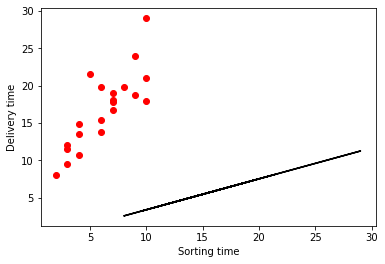

In [32]:
import matplotlib.pylab as plt
plt.scatter(x=delivery["Sorting Time"],y=delivery["Delivery Time"],color='red')
plt.plot(delivery["Delivery Time"],pred,color='black')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [34]:
model2 = smf.ols('deliverytime~np.log(sortingtime)',data=delivery).fit()


In [35]:
model2.params

Intercept              1.159684
np.log(sortingtime)    9.043413
dtype: float64

In [36]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [38]:
model2.resid_pearson

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           2.64e-06
Time:                        09:47:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred2 = model2.predict(pd.DataFrame(delivery[:,:]))

In [43]:
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [44]:
rmse_log = np.sqrt(np.mean((np.array(delivery["Delivery Time"])-np.array(pred2))**2))
rmse_log 

2.733171476682066

In [45]:
pred2.corr(deliverytime)

0.8339325279256244

Text(0, 0.5, 'Delivery time')

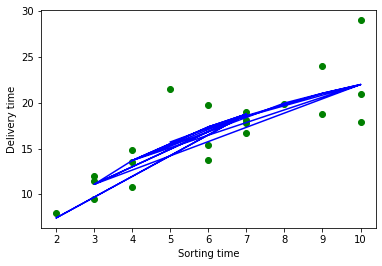

In [46]:
plt.scatter(x=delivery["Sorting Time"],y=delivery["Delivery Time"],color='green')
plt.plot(delivery["Sorting Time"],pred2,color='blue')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [54]:
model3 = smf.ols('np.log(deliverytime)~sortingtime',data=delivery).fit()



In [55]:
model3.params


Intercept      2.121372
sortingtime    0.105552
dtype: float64

In [56]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Wed, 02 Dec 2020   Prob (F-statistic):           1.59e-06
Time:                          09:56:38   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
pred3 = model3.predict(pd.DataFrame(delivery["Sorting Time"])) 

In [53]:
pred3

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [68]:
pred3=np.exp(pred3)  # as we have used log(deliverytime) in preparing model so we need to convert it back
pred3 

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [69]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [70]:
model3.resid_pearson

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

In [71]:
rmse_exp = np.sqrt(np.mean((np.array(delivery["Delivery Time"])-np.array(pred3))**2))
rmse_exp  

2.940250323056201

In [72]:
pred3.corr(deliverytime)

0.808578010828926

Text(0, 0.5, 'Delivery time')

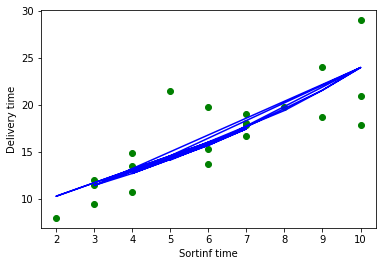

In [73]:
plt.scatter(x=delivery["Sorting Time"],y=delivery["Delivery Time"],color='green')
plt.plot(sortingtime,pred3,color='blue')
plt.xlabel('Sortinf time')
plt.ylabel('Delivery time')

In [74]:
student_resid = model3.resid_pearson 
student_resid 

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

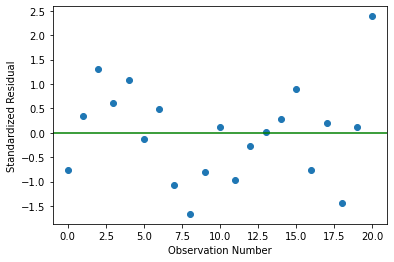

In [75]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

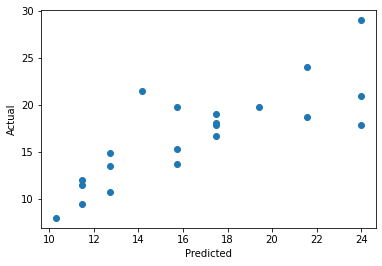

In [77]:
plt.scatter(x=pred3,y=deliverytime)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [88]:
delivery["Sorting Time_Sq"] = sortingtime*sortingtime
delivery 

,Delivery Time,Sorting Time,Sorting Time_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [98]:
sortingtimesq=delivery["Sorting Time_Sq"]

In [99]:
sortingtimesq

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: Sorting Time_Sq, dtype: int64

In [100]:
model4 = smf.ols("np.log(deliverytime)~sortingtimesq",data=delivery).fit()
model4.params 

Intercept        2.429025
sortingtimesq    0.007774
dtype: float64

In [101]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.621
Model:                              OLS   Adj. R-squared:                  0.601
Method:                   Least Squares   F-statistic:                     31.18
Date:                  Wed, 02 Dec 2020   Prob (F-statistic):           2.20e-05
Time:                          10:56:07   Log-Likelihood:                 4.9564
No. Observations:                    21   AIC:                            -5.913
Df Residuals:                        19   BIC:                            -3.824
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4290      0.076     32.014      0.000       2.270       2.588
sortingtimesq     0.0078      0.001      5.584      0.000       0.005       0.011
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.004
Skew:                           0.033   Prob(JB):                        0.998
Kurtosis:                       3.000   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
pred4= model4.predict(delivery)
pred4=np.exp(pred4)  # as we have used log(delivery time ) in preparing model so we need to convert it back
 

In [104]:
pred4

0     24.690864
1     12.850853
2     15.012631
3     21.300397
4     24.690864
5     15.012631
6     16.609171
7     12.170215
8     24.690864
9     21.300397
10    18.663435
11    12.850853
12    16.609171
13    12.170215
14    12.170215
15    12.850853
16    15.012631
17    16.609171
18    11.706230
19    16.609171
20    13.782187
dtype: float64

In [105]:
rmse4 = np.sqrt(np.mean((np.array(delivery["Delivery Time"])-np.array(pred4))**2))
 

In [106]:
rmse4

3.214009746956575

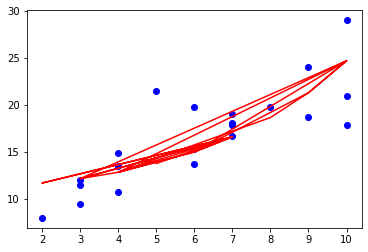

In [107]:
plt.scatter(sortingtime,deliverytime,c="b")
plt.plot(sortingtime,pred4,"r") 

In [108]:
model4.resid

0    -0.161911
1     0.049279
2     0.274262
3     0.119328
4     0.160863
5     0.022224
6     0.134484
7    -0.247700
8    -0.321633
9    -0.127532
10    0.060630
11   -0.178504
12    0.004255
13   -0.056645
14   -0.011588
15    0.146608
16   -0.087853
17    0.086509
18   -0.380680
19    0.070927
20    0.444676
dtype: float64

In [109]:
model4.resid_pearson

array([-0.80590054,  0.24528539,  1.36511884,  0.59394782,  0.80068248,
        0.11061643,  0.6693851 , -1.23290924, -1.60090477, -0.63478174,
        0.30178021, -0.88849393,  0.02118102, -0.28194454, -0.05767885,
        0.72973073, -0.43728276,  0.43059419, -1.89480749,  0.35303662,
        2.21334502])

Text(0, 0.5, 'Standardized Residual')

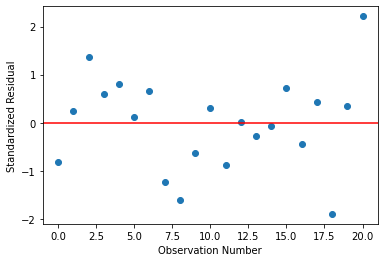

In [111]:
plt.scatter(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([2., 1., 2., 3., 3., 4., 4., 1., 0., 1.]),
 array([-1.89480749, -1.48399224, -1.07317698, -0.66236173, -0.25154648,
         0.15926877,  0.57008402,  0.98089927,  1.39171452,  1.80252977,
         2.21334502]),
 <a list of 10 Patch objects>)

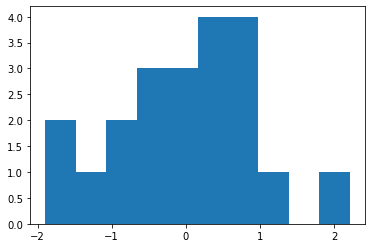

In [112]:
plt.hist(model4.resid_pearson)

In [114]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse4"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse4]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,10.990922,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse4,3.214010,0.621331


Text(0, 0.5, 'Actual')

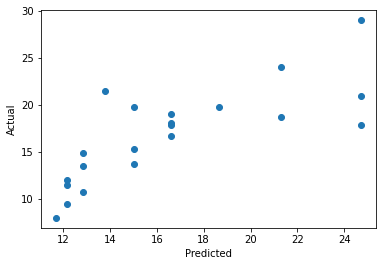

In [115]:
plt.scatter(x=pred4,y=deliverytime)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [120]:
########## salary hike ######### 2nd 

In [122]:
salary = pd.read_csv("Salary_Data.csv")


In [123]:
salary


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [125]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [126]:
salary.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x204c70e42b0>,
 'caps': [<matplotlib.lines.Line2D at 0x204c70e4ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204c70e46d0>],
 'medians': [<matplotlib.lines.Line2D at 0x204c722a1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204c722ac10>],
 'means': []}

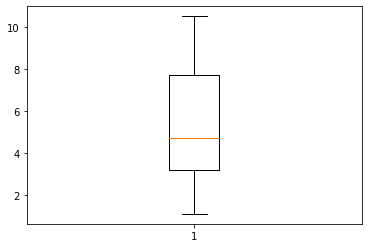

In [127]:
plt.boxplot(salary.YearsExperience)


{'whiskers': [<matplotlib.lines.Line2D at 0x204c75ddb50>,
 'caps': [<matplotlib.lines.Line2D at 0x204c75ddbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204c75dd700>],
 'medians': [<matplotlib.lines.Line2D at 0x204c76e4910>],
 'fliers': [<matplotlib.lines.Line2D at 0x204c76e4e20>],
 'means': []}

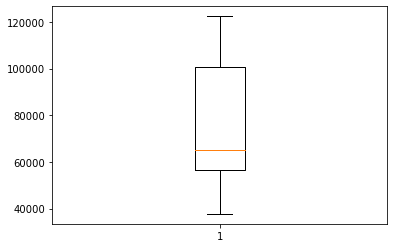

In [128]:
plt.boxplot(salary.Salary)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

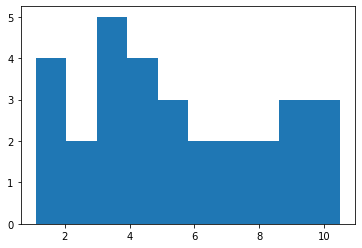

In [129]:
plt.hist(salary.YearsExperience)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

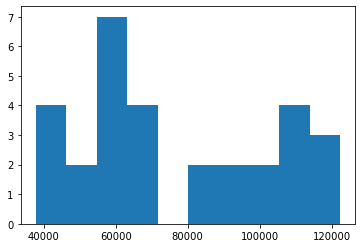

In [130]:
plt.hist(salary.Salary)

Text(0, 0.5, 'Salary_Data.csv')

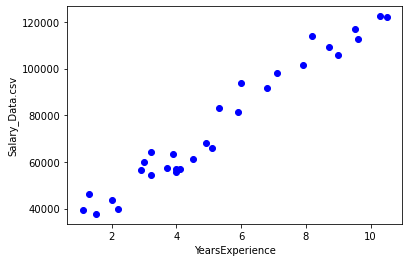

In [131]:
plt.plot(salary.YearsExperience,salary.Salary,"bo")
plt.xlabel("YearsExperience")
plt.ylabel("Salary_Data.csv")

In [132]:
salary.Salary.corr(salary.YearsExperience) 

0.9782416184887598

In [133]:
import statsmodels.formula.api as smf


In [134]:
model=smf.ols("Salary~YearsExperience",data=salary).fit()


In [135]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        11:54:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
model.resid


0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [138]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [140]:
print(model.conf_int(0.05))

                            0             1
Intercept        21136.061314  30448.339084
YearsExperience   8674.118747  10225.805896


In [141]:
pred = model.predict(salary.iloc[:,0])
pred


0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [142]:
rmse_lin = np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred))**2))
rmse_lin 

5592.043608760662

Text(0, 0.5, 'Salary')

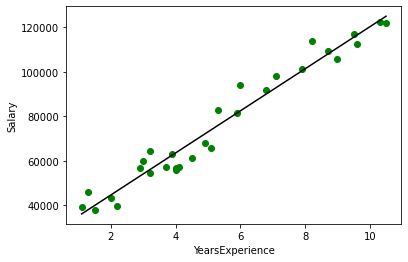

In [143]:
import matplotlib.pylab as plt
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='green')
plt.plot(salary['YearsExperience'],pred,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [144]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=salary).fit()


In [145]:
model2.params


Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [146]:
model2.resid 


0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [147]:
model2.resid_pearson 

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [148]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           3.25e-13
Time:                        11:57:36   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
pred2 = model2.predict(pd.DataFrame(salary['YearsExperience']))

In [150]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [151]:
rmse_log = np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred2))**2))
rmse_log 

10302.893706228308

In [152]:
pred2.corr(salary.Salary)

0.9240610817882637

Text(0, 0.5, 'Salary')

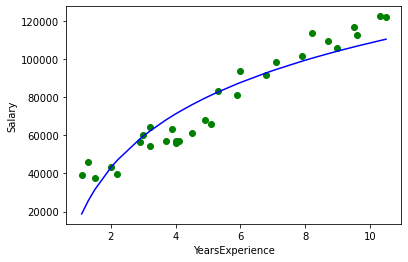

In [153]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='green')
plt.plot(salary['YearsExperience'],pred2,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [154]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=salary).fit()


In [155]:
model3.params


Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [156]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           7.03e-18
Time:                        11:59:14   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
pred_log = model3.predict(pd.DataFrame(salary['YearsExperience']))

In [158]:
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [159]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3 

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [160]:
rmse_exp = np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred3))**2))
rmse_exp 

7213.235076620129

In [161]:
pred3.corr(salary.Salary)

0.9660469705377085

Text(0, 0.5, 'Salary')

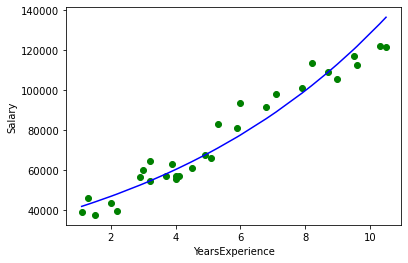

In [162]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='green')
plt.plot(salary.YearsExperience,pred3,color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [163]:
student_resid = model3.resid_pearson 
student_resid 

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Salary')

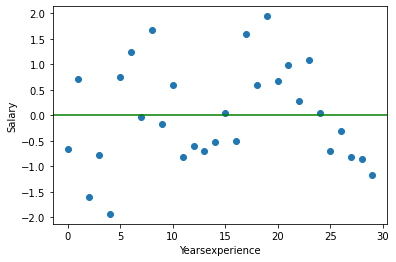

In [164]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Yearsexperience")
plt.ylabel("Salary")

Text(0, 0.5, 'Actual')

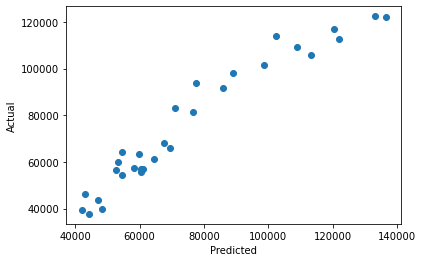

In [165]:
plt.scatter(x=pred3,y=salary.Salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [166]:
salary["YearsExperience_Sq"] = salary.YearsExperience*salary.YearsExperience
salary  

,YearsExperience,Salary,YearsExperience_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [167]:
model_quad = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Sq",data=salary).fit()
model_quad.params 

Intercept             10.336852
YearsExperience        0.202382
YearsExperience_Sq    -0.006614
dtype: float64

In [168]:
model_quad.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           3.95e-18
Time:                        12:02:52   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
pred_quad = model_quad.predict(salary)


In [170]:
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back


In [171]:
pred4


0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [172]:
rmse_quad = np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred4))**2))
rmse_quad  

5391.081582693624

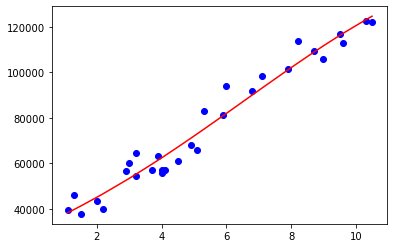

In [173]:
plt.scatter(salary.YearsExperience,salary.Salary,c="b")
plt.plot(salary.YearsExperience,pred4,"r") 

In [174]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967


In [175]:
#therefore first model as higher Rsquare value we should prefer Rmse_lin.